<a href="https://colab.research.google.com/github/vamshitn/Samsung-innovation-campus/blob/main/Bagging_%26_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

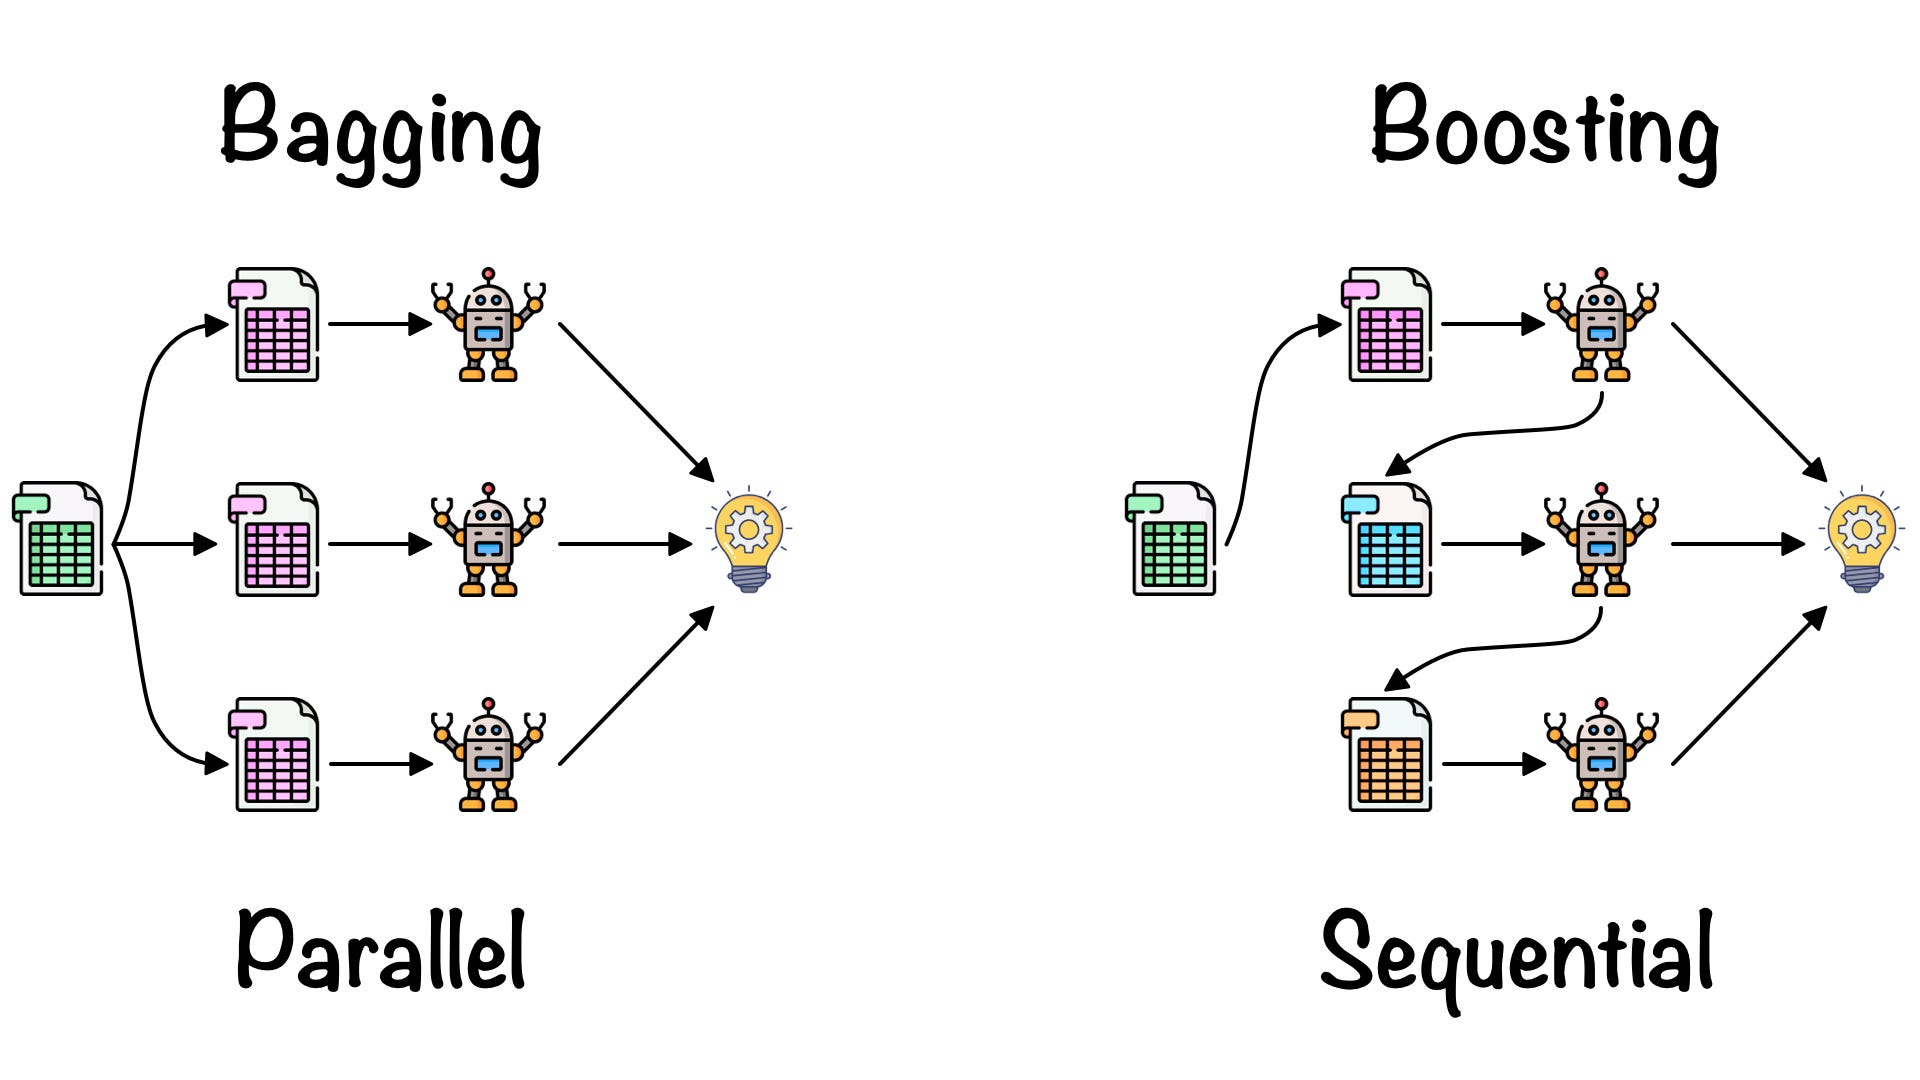

#Bagging (Bootstrap Aggregating)
Bagging works by training multiple base learners (e.g., decision trees) in parallel on different random subsets of the training data (created with replacement, known as bootstrapping). The final prediction is determined by a majority vote for classification or an average for regression.

Methodology:

1. Create multiple random subsets of the original dataset with replacement.

2. Train a separate, independent model on each subset.

3. Combine the predictions using voting or averaging.

Primary Goal: To reduce variance and prevent overfitting, especially with models that are prone to high variance, like deep decision trees.

In [1]:
import time
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#Bagging with Random Forest
For a bagging model, we'll use a Random Forest Classifier, which is a powerful extension of the bagging principle. It trains multiple decision trees on bootstrapped subsets of the data and averages their predictions.

In [2]:
# Initialize and train a Random Forest Classifier
start_time_rf = time.time()

rf_model = BaggingClassifier(estimator=DecisionTreeClassifier(),
                             n_estimators=100,
                             random_state=42)

rf_model.fit(X_train, y_train)

end_time_rf = time.time()

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

training_time_rf = end_time_rf - start_time_rf

print("=== Bagging (Random Forest) ===")
print(f"Accuracy: {accuracy_rf:.4f}")

print(f"ROC AUC Score: {roc_auc_rf:.4f}")

print(f"Training Time: {training_time_rf:.4f} seconds")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

=== Bagging (Random Forest) ===
Accuracy: 0.9474
ROC AUC Score: 0.9391
Training Time: 3.9905 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        64
           1       0.95      0.97      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



#Boosting
Boosting trains multiple models sequentially. Each new model is trained to correct the errors of the previous ones. The algorithm assigns higher weights to the data points that were misclassified by the preceding model, forcing the subsequent models to focus on these difficult cases. The final prediction is a weighted sum of the individual model predictions.


Methodology:

1. Train a base model on the entire dataset.

2. Analyze the model's errors and assign higher weights to misclassified instances.

3. Train a new model on the re-weighted dataset, focusing on the difficult instances.

4. Repeat the process for a specified number of iterations.

5. Combine the models with weights based on their performance.

Primary Goal: To reduce bias and improve the overall accuracy of a weak learner.#

#Boosting with AdaBoost
For a boosting model, we'll use AdaBoost, which sequentially trains weak learners and focuses on correcting previous misclassifications by giving them higher weights. We'll use a decision tree as the base estimator.

In [3]:
# Initialize and train an AdaBoost Classifier
start_time_ada = time.time()
ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                               n_estimators=100,
                               random_state=42,
                               learning_rate=0.5)

ada_model.fit(X_train, y_train)
end_time_ada = time.time()

# Make predictions and evaluate
y_pred_ada = ada_model.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
roc_auc_ada = roc_auc_score(y_test, y_pred_ada)
training_time_ada = end_time_ada - start_time_ada

print("\n=== Boosting (AdaBoost) ===")
print(f"Accuracy: {accuracy_ada:.4f}")

print(f"ROC AUC Score: {roc_auc_ada:.4f}")

print(f"Training Time: {training_time_ada:.4f} seconds")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada))


=== Boosting (AdaBoost) ===
Accuracy: 0.9532
ROC AUC Score: 0.9438
Training Time: 1.6989 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        64
           1       0.95      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



#Boosting with Gradient Boosting
For another boosting model, we'll use Gradient Boosting, which builds models sequentially to minimize a loss function using gradient descent.

In [4]:
# Initialize and train a Gradient Boosting Classifier
start_time_gb = time.time()
gb_model = GradientBoostingClassifier(n_estimators=100,
                                      learning_rate=0.1,
                                      max_depth=3,
                                      random_state=42)
gb_model.fit(X_train, y_train)
end_time_gb = time.time()

# Make predictions and evaluate
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)
training_time_gb = end_time_gb - start_time_gb

print("\n=== Boosting (Gradient Boosting) ===")
print(f"Accuracy: {accuracy_gb:.4f}")

print(f"ROC AUC Score: {roc_auc_gb:.4f}")

print(f"Training Time: {training_time_gb:.4f} seconds")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))


=== Boosting (Gradient Boosting) ===
Accuracy: 0.9474
ROC AUC Score: 0.9391
Training Time: 1.6146 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        64
           1       0.95      0.97      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



When you run this code, you will likely see that Gradient Boosting and AdaBoost achieve very high accuracy, often slightly outperforming the Random Forest model on this specific dataset. This confirms the theoretical comparison: boosting's ability to correct errors sequentially makes it highly effective on well-behaved datasets like load_breast_cancer, which has a low signal-to-noise ratio. Random Forest is also a top performer, but its primary focus on variance reduction may not offer the same slight edge as the bias reduction of boosting for this particular problem.

#Stacking
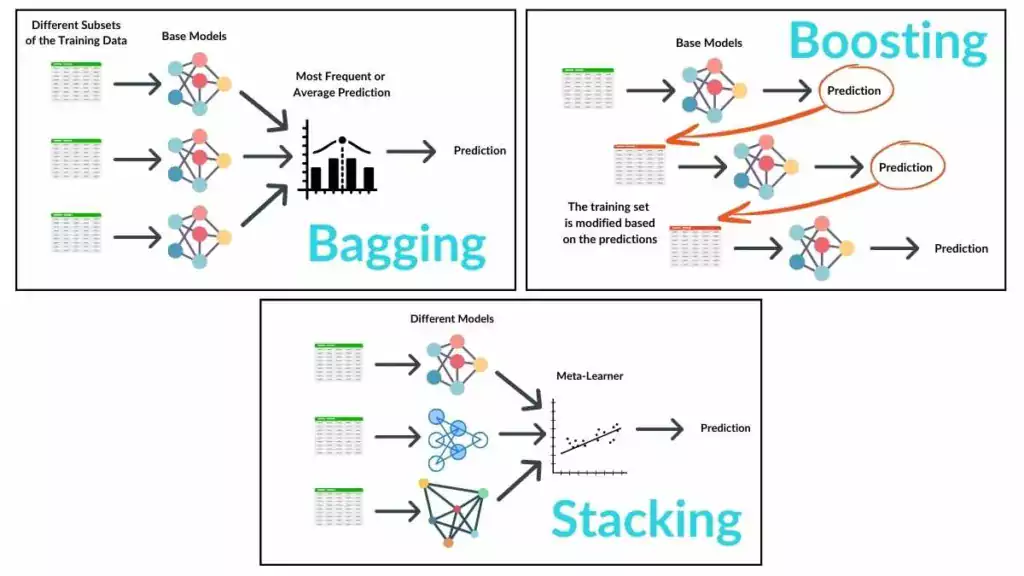

Stacking is a powerful ensemble learning method that combines the predictions of multiple diverse models (base estimators) to create a final, more robust prediction. This is done by training a final classifier, or "meta-model," on the output of the base models.

For the load_breast_cancer dataset, stacking can achieve very high accuracy by leveraging the strengths of different types of models. A common approach is to use a mix of base models, like a K-Nearest Neighbors (KNN), a Support Vector Machine (SVM), and a Gradient Boosting Classifier, and then use a simple Logistic Regression as the meta-model to combine their predictions.

In [5]:
import numpy as np
import time
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

2. Define Base Models and Meta-Model

We define our base estimators, each a different type of classifier, and a single final estimator (the meta-model). Stacking will train the base models and then use their predictions to train the final model

In [6]:
# Define the base models (Level-0)
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svm', SVC(kernel='rbf', C=1.0, probability=True, random_state=42)), # probability=True is needed for predict_proba
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
]

# Define the final estimator (Meta-model)
final_estimator = LogisticRegression()

# Initialize the Stacking Classifier
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5, # Use cross-validation to prevent data leakage
    passthrough=False # Set to True to include original features as well
)

3. Train and Evaluate the Stacking Model

Finally, train the stacking model on the scaled data and evaluate its performance on the test se

In [7]:
# Train the stacking model
start_time_stack = time.time()
stacking_model.fit(X_train_scaled, y_train)
end_time_stack = time.time()

# Make predictions and evaluate
y_pred_stack = stacking_model.predict(X_test_scaled)
accuracy_stack = accuracy_score(y_test, y_pred_stack)
roc_auc_stack = roc_auc_score(y_test, y_pred_stack)
training_time_stack = end_time_stack - start_time_stack

print("=== Stacking Classifier ===")
print(f"Accuracy: {accuracy_stack:.4f}")
print(f"ROC AUC Score: {roc_auc_stack:.4f}")
print(f"Training Time: {training_time_stack:.4f} seconds")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_stack))

=== Stacking Classifier ===
Accuracy: 0.9649
ROC AUC Score: 0.9563
Training Time: 8.9115 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        64
           1       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



Stacking often results in a final model that is more accurate than any of the individual base models. This is because the meta-model learns how to combine the strengths and compensate for the weaknesses of each base model. For the load_breast_cancer dataset, stacking is a highly effective approach, as the diversity of the base models (distance-based KNN, kernel-based SVM, and sequential boosting GB) allows the final model to make a very well-informed decision.